In [29]:
import string
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import re
import tensorflow as tf

# add datasets
data = pd.read_csv("/kaggle/input/finetuning-llm/Dataset_Finetuning.csv")

# convert labels to numeric values
data['output'] = data['output'].apply(lambda s: 0 if s == 'NO' else 1)
data

,instruction,input,output
0,Categorize the essay into two categories as to...,California is the biggest example of city plan...,1
1,Categorize the essay into two categories as to...,A life without cars sure sounds like a great i...,0
2,Categorize the essay into two categories as to...,Cars are used used in everyday life but they m...,0
3,Categorize the essay into two categories as to...,The electoral collage should be disbanded. Not...,0
4,Categorize the essay into two categories as to...,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...,...
2489,Categorize the essay into two categories as to...,"Dear Florida senator, It is in the interest of...",0
2490,Categorize the essay into two categories as to...,Driving can be a huge hassle. Having to spend ...,0
2491,Categorize the essay into two categories as to...,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,Categorize the essay into two categories as to...,"The electoral college is pointless, I believe ...",0


In [30]:
data['output'] = data['output'].astype(float)

In [31]:
data

,instruction,input,output
0,Categorize the essay into two categories as to...,California is the biggest example of city plan...,1.0
1,Categorize the essay into two categories as to...,A life without cars sure sounds like a great i...,0.0
2,Categorize the essay into two categories as to...,Cars are used used in everyday life but they m...,0.0
3,Categorize the essay into two categories as to...,The electoral collage should be disbanded. Not...,0.0
4,Categorize the essay into two categories as to...,"Dear Mr.Mrs. Senator, The Electoral College is...",0.0
...,...,...,...
2489,Categorize the essay into two categories as to...,"Dear Florida senator, It is in the interest of...",0.0
2490,Categorize the essay into two categories as to...,Driving can be a huge hassle. Having to spend ...,0.0
2491,Categorize the essay into two categories as to...,"Dear\nSenator,\n\nI am writing to express my o...",1.0
2492,Categorize the essay into two categories as to...,"The electoral college is pointless, I believe ...",0.0


In [32]:
# Remove punctuation and lowercase data
data['input'] = data['input'].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))
data['input'] = data['input'].apply(lambda s: s.lower())

# Remove all non alphanumeric char
data["input"] = data["input"].apply(lambda s: re.sub(r'[^\w\s]', '', s))
data

,instruction,input,output
0,Categorize the essay into two categories as to...,california is the biggest example of city plan...,1.0
1,Categorize the essay into two categories as to...,a life without cars sure sounds like a great i...,0.0
2,Categorize the essay into two categories as to...,cars are used used in everyday life but they m...,0.0
3,Categorize the essay into two categories as to...,the electoral collage should be disbanded not ...,0.0
4,Categorize the essay into two categories as to...,dear mrmrs senator the electoral college is a ...,0.0
...,...,...,...
2489,Categorize the essay into two categories as to...,dear florida senator it is in the interest of ...,0.0
2490,Categorize the essay into two categories as to...,driving can be a huge hassle having to spend m...,0.0
2491,Categorize the essay into two categories as to...,dear\nsenator\n\ni am writing to express my op...,1.0
2492,Categorize the essay into two categories as to...,the electoral college is pointless i believe t...,0.0


In [33]:
import spacy
from tqdm import tqdm

# load the spacy language model
nlp = spacy.load('en_core_web_sm')

# define a function to apply lemmatization to a sentence
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc])
    return lemmatized_sentence

# create an empty list to store the lemmatized text
lemmatized_text = []

# apply the lemmatization function to the 'input' column with tqdm
for sentence in tqdm(data['input']):
    lemmatized_sentence = lemmatize_sentence(sentence)
    lemmatized_text.append(lemmatized_sentence)

# add the lemmatized text to the dataframe as a new column
data['text_lemmatized'] = lemmatized_text
data

100%|██████████| 2494/2494 [03:15<00:00, 12.77it/s]


,instruction,input,output,text_lemmatized
0,Categorize the essay into two categories as to...,california is the biggest example of city plan...,1.0,california be the big example of city planning...
1,Categorize the essay into two categories as to...,a life without cars sure sounds like a great i...,0.0,a life without car sure sound like a great ide...
2,Categorize the essay into two categories as to...,cars are used used in everyday life but they m...,0.0,car be use use in everyday life but they may b...
3,Categorize the essay into two categories as to...,the electoral collage should be disbanded not ...,0.0,the electoral collage should be disband not on...
4,Categorize the essay into two categories as to...,dear mrmrs senator the electoral college is a ...,0.0,dear mrmrs senator the electoral college be a ...
...,...,...,...,...
2489,Categorize the essay into two categories as to...,dear florida senator it is in the interest of ...,0.0,dear florida senator it be in the interest of ...
2490,Categorize the essay into two categories as to...,driving can be a huge hassle having to spend m...,0.0,driving can be a huge hassle have to spend mon...
2491,Categorize the essay into two categories as to...,dear\nsenator\n\ni am writing to express my op...,1.0,dear \n senator \n\n I be write to express my ...
2492,Categorize the essay into two categories as to...,the electoral college is pointless i believe t...,0.0,the electoral college be pointless I believe t...


In [34]:
from nltk.stem.snowball import SnowballStemmer

# load the Snowball stemmer for English
stemmer = SnowballStemmer('english')

# define a function to apply stemming to a sentence
def stem_sentence(sentence):
    words = sentence.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

# create an empty list to store the stemmed text
stemmed_text = []

# apply the stemming function to the 'input' column with tqdm
for sentence in tqdm(data['input']):
    stemmed_sentence = stem_sentence(sentence)
    stemmed_text.append(stemmed_sentence)

# add the stemmed text to the dataframe as a new column
data['text_stemmed'] = stemmed_text
data

100%|██████████| 2494/2494 [00:18<00:00, 134.69it/s]


,instruction,input,output,text_lemmatized,text_stemmed
0,Categorize the essay into two categories as to...,california is the biggest example of city plan...,1.0,california be the big example of city planning...,california is the biggest exampl of citi plan ...
1,Categorize the essay into two categories as to...,a life without cars sure sounds like a great i...,0.0,a life without car sure sound like a great ide...,a life without car sure sound like a great ide...
2,Categorize the essay into two categories as to...,cars are used used in everyday life but they m...,0.0,car be use use in everyday life but they may b...,car are use use in everyday life but they may ...
3,Categorize the essay into two categories as to...,the electoral collage should be disbanded not ...,0.0,the electoral collage should be disband not on...,the elector collag should be disband not onli ...
4,Categorize the essay into two categories as to...,dear mrmrs senator the electoral college is a ...,0.0,dear mrmrs senator the electoral college be a ...,dear mrmrs senat the elector colleg is a proce...
...,...,...,...,...,...
2489,Categorize the essay into two categories as to...,dear florida senator it is in the interest of ...,0.0,dear florida senator it be in the interest of ...,dear florida senat it is in the interest of yo...
2490,Categorize the essay into two categories as to...,driving can be a huge hassle having to spend m...,0.0,driving can be a huge hassle have to spend mon...,drive can be a huge hassl have to spend money ...
2491,Categorize the essay into two categories as to...,dear\nsenator\n\ni am writing to express my op...,1.0,dear \n senator \n\n I be write to express my ...,dear senat i am write to express my opinion on...
2492,Categorize the essay into two categories as to...,the electoral college is pointless i believe t...,0.0,the electoral college be pointless I believe t...,the elector colleg is pointless i believ that ...


In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization

nlp = spacy.load('en_core_web_sm')

# Perform POS tagging using spaCy
pos_tags = []
for text in tqdm(data['input'], desc='POS tagging'):
    doc = nlp(text)
    tags = [token.pos_ for token in doc]
    pos_tags.append(tags)
    
# convert list of POS tags to a string
pos_strings = [' '.join(pos_list) for pos_list in pos_tags]
data['pos'] = pos_strings
data

POS tagging: 100%|██████████| 2494/2494 [03:14<00:00, 12.80it/s]


,instruction,input,output,text_lemmatized,text_stemmed,pos
0,Categorize the essay into two categories as to...,california is the biggest example of city plan...,1.0,california be the big example of city planning...,california is the biggest exampl of citi plan ...,PROPN AUX DET ADJ NOUN ADP NOUN NOUN PRON VERB...
1,Categorize the essay into two categories as to...,a life without cars sure sounds like a great i...,0.0,a life without car sure sound like a great ide...,a life without car sure sound like a great ide...,DET NOUN ADP NOUN ADV VERB ADP DET ADJ NOUN AD...
2,Categorize the essay into two categories as to...,cars are used used in everyday life but they m...,0.0,car be use use in everyday life but they may b...,car are use use in everyday life but they may ...,NOUN AUX VERB VERB ADP ADJ NOUN CCONJ PRON AUX...
3,Categorize the essay into two categories as to...,the electoral collage should be disbanded not ...,0.0,the electoral collage should be disband not on...,the elector collag should be disband not onli ...,DET ADJ NOUN AUX AUX VERB PART ADV AUX PRON AD...
4,Categorize the essay into two categories as to...,dear mrmrs senator the electoral college is a ...,0.0,dear mrmrs senator the electoral college be a ...,dear mrmrs senat the elector colleg is a proce...,ADJ ADJ NOUN DET PROPN NOUN AUX DET NOUN VERB ...
...,...,...,...,...,...,...
2489,Categorize the essay into two categories as to...,dear florida senator it is in the interest of ...,0.0,dear florida senator it be in the interest of ...,dear florida senat it is in the interest of yo...,ADJ PROPN NOUN PRON AUX ADP DET NOUN ADP PRON ...
2490,Categorize the essay into two categories as to...,driving can be a huge hassle having to spend m...,0.0,driving can be a huge hassle have to spend mon...,drive can be a huge hassl have to spend money ...,NOUN AUX AUX DET ADJ NOUN VERB PART VERB NOUN ...
2491,Categorize the essay into two categories as to...,dear\nsenator\n\ni am writing to express my op...,1.0,dear \n senator \n\n I be write to express my ...,dear senat i am write to express my opinion on...,ADJ SPACE NOUN SPACE PRON AUX VERB PART VERB P...
2492,Categorize the essay into two categories as to...,the electoral college is pointless i believe t...,0.0,the electoral college be pointless I believe t...,the elector colleg is pointless i believ that ...,DET PROPN PROPN AUX ADJ PRON VERB SCONJ PRON A...


In [36]:
from tensorflow.keras.layers import TextVectorization

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

train_tf = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
test_tf = tf.data.Dataset.from_tensor_slices((test_x, test_y))

train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)

vectorizer = TextVectorization(max_tokens=5000)
train_text = train_dataset.map(lambda input, output: text)
vectorizer.adapt(train_text)

model_RNN = tf.keras.Sequential([
    vectorizer,                       
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=64, mask_zero=True), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_RNN.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))
model_RNN.fit(train_dataset, epochs=20, validation_data=valid_dataset, validation_steps=20, callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))
test_loss, test_acc = model_RNN.evaluate(test_dataset)

model_RNN.summary()

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: ',test_acc)

Epoch 1/20
32/32 [==============================] - 20s 245ms/step - loss: 1.2919 - accuracy: 0.5582 - val_loss: 1.1690 - val_accuracy: 0.4756
Epoch 2/20
32/32 [==============================] - 3s 92ms/step - loss: 0.8981 - accuracy: 0.5582
Epoch 3/20
32/32 [==============================] - 3s 94ms/step - loss: 0.7334 - accuracy: 0.5582
Epoch 4/20
32/32 [==============================] - 3s 90ms/step - loss: 0.6766 - accuracy: 0.5894
Epoch 5/20
32/32 [==============================] - 3s 86ms/step - loss: 0.6688 - accuracy: 0.5820
Epoch 6/20
32/32 [==============================] - 3s 89ms/step - loss: 0.6643 - accuracy: 0.6087
Epoch 7/20
32/32 [==============================] - 3s 84ms/step - loss: 0.6599 - accuracy: 0.6043
Epoch 8/20
32/32 [==============================] - 3s 88ms/step - loss: 0.6540 - accuracy: 0.6365
Epoch 9/20
32/32 [==============================] - 3s 79ms/step - loss: 0.6467 - accuracy: 0.6226
Epoch 10/20
32/32 [==============================] - 3s 86ms/step

In [37]:
test_x

2213    the advantages of limiting car usage are numer...
2072    in the modern world the use of cars has become...
1394    americas love affair with its vehicles seems t...
2152    letter to the state senator\n\nin americas ele...
1058    every day thousands of people lose their lives...
                              ...                        
651     dear state senator\n\ni am writing in ba 200 c...
353     do we want to change our electoral college to ...
170     limiting car usage is one of the most crucial ...
1505    the advantages of limiting car usage are abund...
1938    the advantages of limiting car usage are abund...
Name: input, Length: 250, dtype: object

8/8 [==============================] - 3s 34ms/step
accuracy: 0.804
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       141
         1.0       0.76      0.80      0.78       109

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



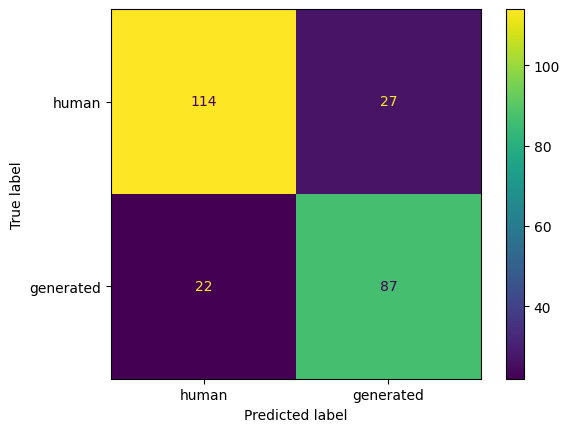

In [38]:
pred_y = [0 if (pred < 0.5) else 1 for pred in model_RNN.predict(test_x)]

from sklearn.metrics import accuracy_score
print('accuracy: '+ str(accuracy_score(pred_y, test_y)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, pred_y), display_labels=['human', 'generated'])
cmd.plot()

# Generate a classification report
report = classification_report(test_y, pred_y)

# Print the classification report
print(report)

In [39]:
pred_y

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1]

In [40]:
test_y

2213    1.0
2072    1.0
1394    0.0
2152    1.0
1058    0.0
       ... 
651     1.0
353     1.0
170     1.0
1505    1.0
1938    1.0
Name: output, Length: 250, dtype: float64

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from gensim.models import Word2Vec
import numpy as np

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

train_tf = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
test_tf = tf.data.Dataset.from_tensor_slices((test_x, test_y))

train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
# Train Word2Vec embeddings
corpus = [text.split() for text in train_x]
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get the embedding matrix
embedding_matrix = word2vec_model.wv.vectors

vectorizer = TextVectorization(max_tokens=len(word2vec_model.wv), output_sequence_length=500)
train_text = train_dataset.map(lambda text, label: text)
vectorizer.adapt(train_text)

# Create an embedding layer with pre-trained Word2Vec weights
embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(word2vec_model.wv),
    output_dim=word2vec_model.vector_size,
    weights=[embedding_matrix],
    trainable=False
)

model_RNN_Word2Vec = tf.keras.Sequential([
    vectorizer,
    embedding_layer,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_RNN_Word2Vec.summary()

model_RNN_Word2Vec.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))
model_RNN_Word2Vec.fit(train_dataset, epochs=20, validation_data=valid_dataset, validation_steps=20, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))
test_loss_rnn_word2vec, test_acc_rnn_word2vec = model_RNN_Word2Vec.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_4 (Text  (None, 500)               0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 500, 100)          2265700   
                                                                 
 bidirectional_5 (Bidirecti  (None, 500, 128)          84480     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 500, 128)          0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                      

8/8 [==============================] - 2s 37ms/step
accuracy: 0.848
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       141
         1.0       0.79      0.89      0.84       109

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



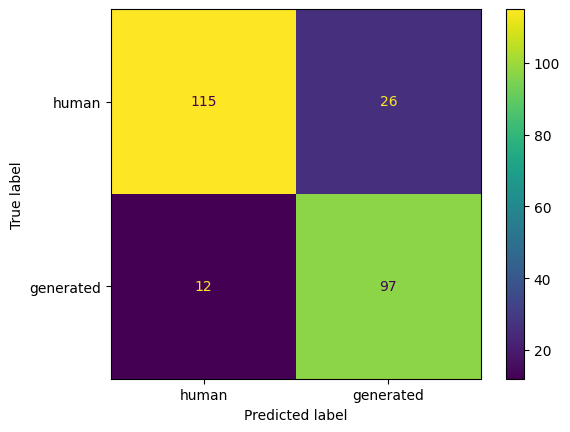

In [42]:
pred_y = [0 if (pred < 0.5) else 1 for pred in model_RNN_Word2Vec.predict(test_x)]

from sklearn.metrics import accuracy_score
print('accuracy: '+ str(accuracy_score(pred_y, test_y)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, pred_y), display_labels=['human', 'generated'])
cmd.plot()

# Generate a classification report
report = classification_report(test_y, pred_y)

# Print the classification report
print(report)

In [43]:
data['input']

0       california is the biggest example of city plan...
1       a life without cars sure sounds like a great i...
2       cars are used used in everyday life but they m...
3       the electoral collage should be disbanded not ...
4       dear mrmrs senator the electoral college is a ...
                              ...                        
2489    dear florida senator it is in the interest of ...
2490    driving can be a huge hassle having to spend m...
2491    dear\nsenator\n\ni am writing to express my op...
2492    the electoral college is pointless i believe t...
2493    although the usage of motorized vehicles such ...
Name: input, Length: 2494, dtype: object

In [44]:
train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)

predictions_rnn = model_RNN.predict(test_x)
predictions_rnn_word2vec = model_RNN_Word2Vec.predict(test_x)

# Define the threshold
threshold = 0.5

8/8 [==============================] - 0s 38ms/step


In [45]:
test_y.shape

(250,)

In [47]:
predictions_rnn_word2vec

array([[0.8818283 ],
       [0.9101478 ],
       [0.06289155],
       [0.9266877 ],
       [0.333549  ],
       [0.8380049 ],
       [0.9329118 ],
       [0.51608455],
       [0.40933162],
       [0.35206294],
       [0.01771333],
       [0.43703496],
       [0.8455561 ],
       [0.6349049 ],
       [0.01862952],
       [0.24190636],
       [0.04712477],
       [0.3768772 ],
       [0.29473183],
       [0.02002725],
       [0.53243285],
       [0.90400445],
       [0.10137029],
       [0.5286164 ],
       [0.53072965],
       [0.9245259 ],
       [0.01872434],
       [0.08729572],
       [0.07393581],
       [0.86022925],
       [0.49709386],
       [0.45582324],
       [0.95542186],
       [0.92220527],
       [0.9370395 ],
       [0.8373572 ],
       [0.03845192],
       [0.3740772 ],
       [0.84944856],
       [0.01413095],
       [0.81939346],
       [0.34954914],
       [0.02192245],
       [0.14403218],
       [0.04575185],
       [0.06271052],
       [0.9235649 ],
       [0.908

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)

# Creating a Pipeline with only TfidfVectorizer
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fitting the Model
model_LR = pipeline.fit(train_x, train_y)

# Making Predictions
predicted_LR = model_LR.predict(test_x)

# Evaluating the Model
accuracy_LR = accuracy_score(test_y, predicted_LR)
print("Accuracy (Logistic Regression):", accuracy_LR)
print(classification_report(test_y, predicted_LR))

Accuracy (Logistic Regression): 0.944
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       141
         1.0       0.99      0.88      0.93       109

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [49]:
predicted_LR

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [50]:
test_y

2213    1.0
2072    1.0
1394    0.0
2152    1.0
1058    0.0
       ... 
651     1.0
353     1.0
170     1.0
1505    1.0
1938    1.0
Name: output, Length: 250, dtype: float64

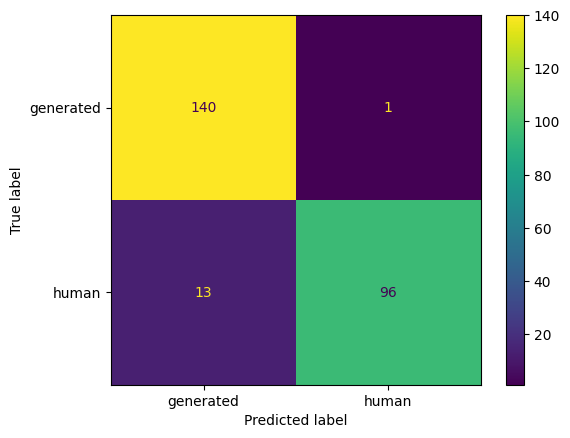

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, predicted_LR), display_labels=['generated', 'human'])
cmd.plot()